# **MNIST with Tensorflow**
 

In [ ]:
import tensorflow as tf
tf.__version__

'2.2.0-rc3'

Let's prepare the datasets. Keras Datasets provides us 70000 MNIST images, which the first 60000 will be used to train, and the rest 10000 will be used to test. <br> Documentation is here: https://keras.io/datasets/

In [ ]:
from tensorflow import keras

mnist = keras.datasets.mnist
(xTrainFull, yTrainFull), (xTest, yTest) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


We will validate the data by calling .shape method:

In [ ]:
xTrainFull.shape

(60000, 28, 28)

xTrainFull has 60000 images, each image is in the form of 28x28 matrix, ranging from 0 to 255.

In [ ]:
yTrainFull.shape

(60000,)

yTrainFull's size is also 60000, which gives us what the image represents respectively.

Now we will try to visualize the data using matplotlib.pyplot:

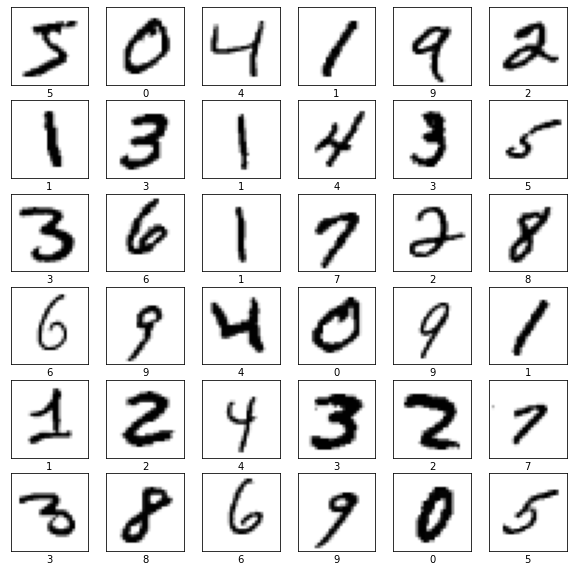

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xTrainFull[i], cmap=plt.cm.binary)
    plt.xlabel(yTrainFull[i])
plt.show()

Each image above is labelled with the corresponding number. Now we will plot the first image, which is 5, and use the color bar to see it more clearly:

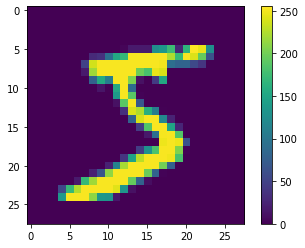

In [ ]:
plt.figure()
plt.imshow(xTrainFull[0])
plt.colorbar()
plt.grid(False)
plt.show()

Since the pixel density ranges from 0 to 255, we have to scale it back to between 0 and 1, for better performance. Also, we will split the xTrainFull into two parts: part 1 is to train, part 2 is to validate.

In [ ]:
xValid, xTrain = xTrainFull[:5000]/255.0, xTrainFull[5000:]/255.0
yValid, yTrain = yTrainFull[:5000], yTrainFull[5000:]

Now to prepare the model! We will use the normal Neural Network, which is sequential. The input layer will take input_shape = [28,28], since the images' size is 28x28 = 784 pixels. <br>
The next layer will have 784 neurons with activation is *'relu'*, the third will have 100 neurons with activation is *'relu'*, and the output layer will have 10 with *'softmax'* activation, since we need to know the recognition of the images.<br>
You can change the number of the neurons, but be careful since it can result in overfit.<br>
For more information about activation, read this document: https://keras.io/activations/

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(784, activation='relu'))
model.add(keras.layers.Dense(100, activation ='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


Now we must compile the model. According to https://jovianlin.io/cat-crossentropy-vs-sparse-cat-crossentropy/, we should use sparse_cat_crossentropy, since our target values are integers. Optimizer will be *'Adam'* and metrics is *'accuracy'*

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])

Time to train the model! We will repeat the process 30 times by setting epochs = 30

In [ ]:
his = model.fit(xTrain, yTrain, epochs = 30, validation_data=(xValid, yValid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1938 - accuracy: 0.9411 - val_loss: 0.0986 - val_accuracy: 0.9690
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0806 - accuracy: 0.9746 - val_loss: 0.0719 - val_accuracy: 0.9770
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0548 - accuracy: 0.9820 - val_loss: 0.0944 - val_accuracy: 0.9756
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0397 - accuracy: 0.9874 - val_loss: 0.0694 - val_accuracy: 0.9806
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0322 - accuracy: 0.9893 - val_loss: 0.0897 - val_accuracy: 0.9782
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.0727 - val_accuracy: 0.9812
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0226 - accuracy: 0.9923 - val_loss: 0.0909 - val_accuracy:

Accuracy is above 80%, very good! Now it's time to evaluate the model with the 10000 xTest images!

In [ ]:
model.evaluate(xTest, yTest)

313/313 [==============================] - 1s 2ms/step - loss: 38.1842 - accuracy: 0.9813


[38.18424987792969, 0.9812999963760376]

Next we will use pandas to plot the learning process.

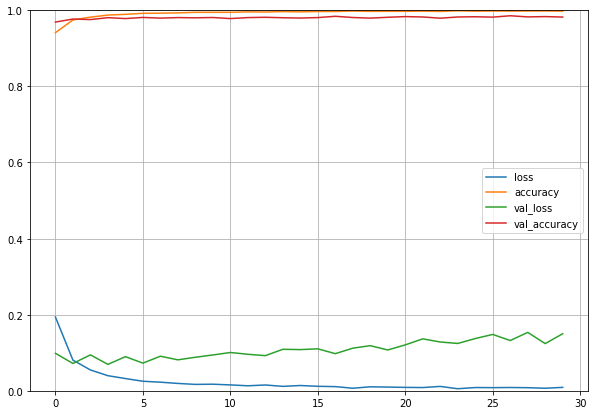

In [ ]:
import pandas as pd

pd.DataFrame(his.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

We need the results! Use *predict* method to get the predictions.

In [ ]:
predictions = model.predict(xTest)

Now let's read the first prediction.

In [ ]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Well it returns us the probability that the image is the number, from 0 to 9, so we need the max probability of it:

In [ ]:
import numpy as np

np.argmax(predictions[0])

7

Let's see what our model gives us. We will plot the first 100 results:

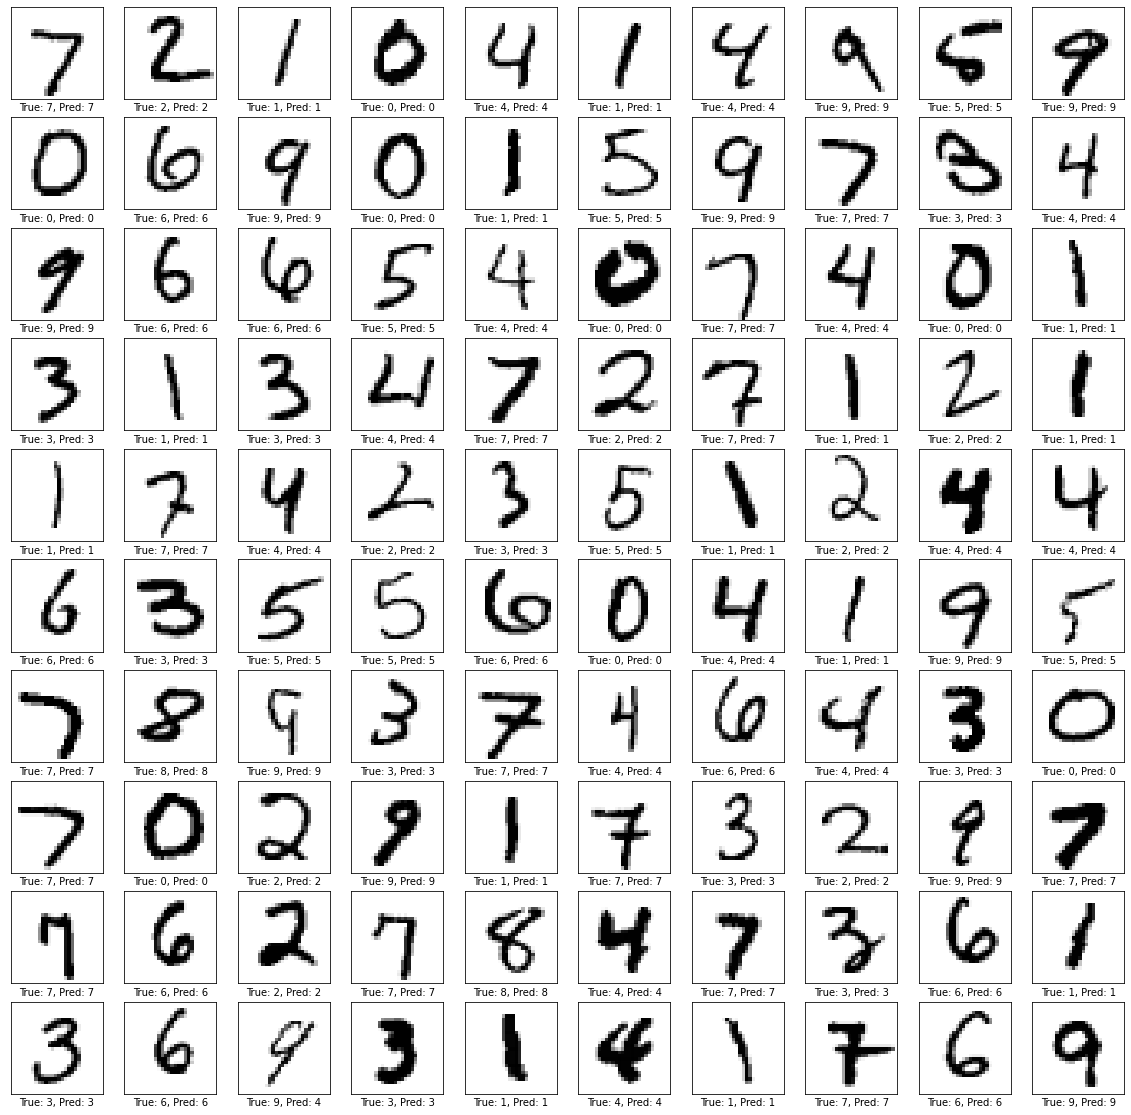

In [ ]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xTest[i], cmap=plt.cm.binary)
    plt.xlabel('True: {}, Pred: {}'.format(yTest[i], np.argmax(predictions[i])))
plt.show()

Hold up, what about the wrong results? Ok so we will identify the wrong results as well:

In [ ]:
wrongAns = []
for i in range(len(yTest)):
  if yTest[i] != np.argmax(predictions[i]):
    wrongAns.append(i)
len(wrongAns)

187

So we have the position of the wrong results. Let's plot it and see what the model predicts, and compares it to the true value:

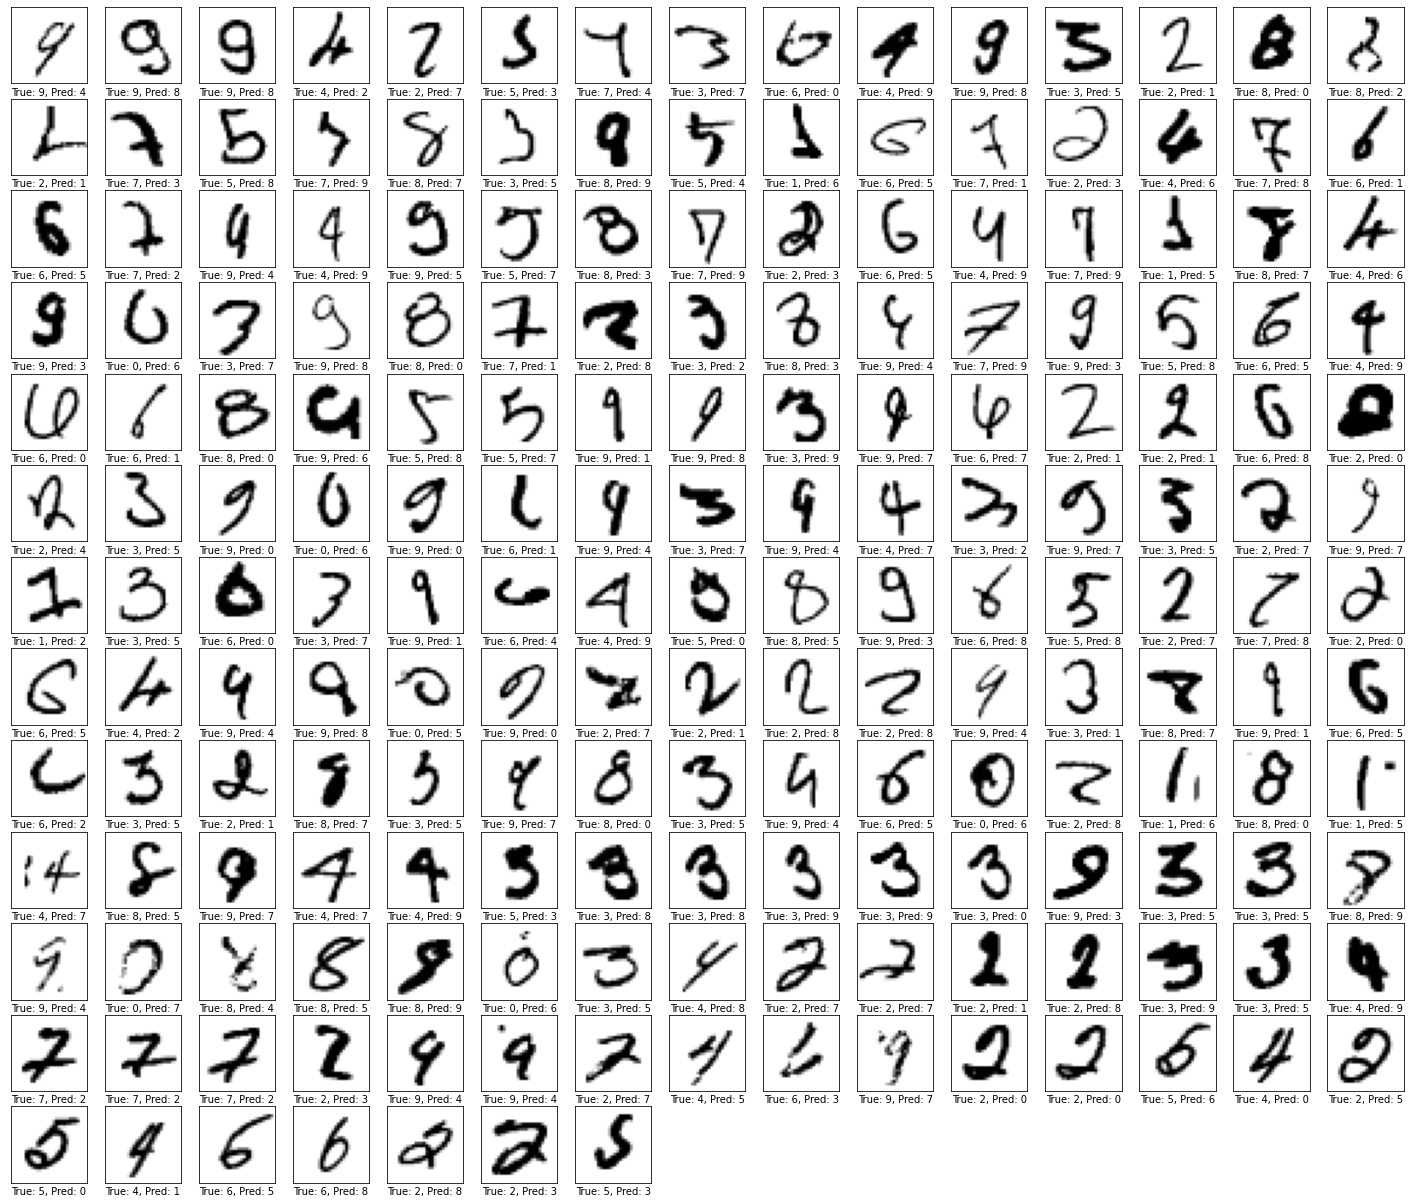

In [ ]:
plt.figure(figsize=(25,25))
for i in range(len(wrongAns)):
    plt.subplot(15,15,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xTest[wrongAns[i]], cmap=plt.cm.binary)
    plt.xlabel('True: {}, Pred: {}'.format(yTest[wrongAns[i]], np.argmax(predictions[wrongAns[i]])))
plt.show()